## Load Sample Data Batch

In [1]:
import torch

clean_batch = torch.load("tensor_data/clean/images_0.pt", weights_only=True)

defocus_batch = torch.load("tensor_data/noisy/defocus_blur/images_0.pt", weights_only=True)
frost_batch = torch.load("tensor_data/noisy/frost_noise/images_0.pt", weights_only=True)
gaussian_batch = torch.load("tensor_data/noisy/gaussian_noise/images_0.pt", weights_only=True)
jpeg_batch = torch.load("tensor_data/noisy/jpeg_compression/images_0.pt", weights_only=True)
speckle_batch = torch.load("tensor_data/noisy/speckle_noise/images_0.pt", weights_only=True)

Visualize the first image in each type of data batch

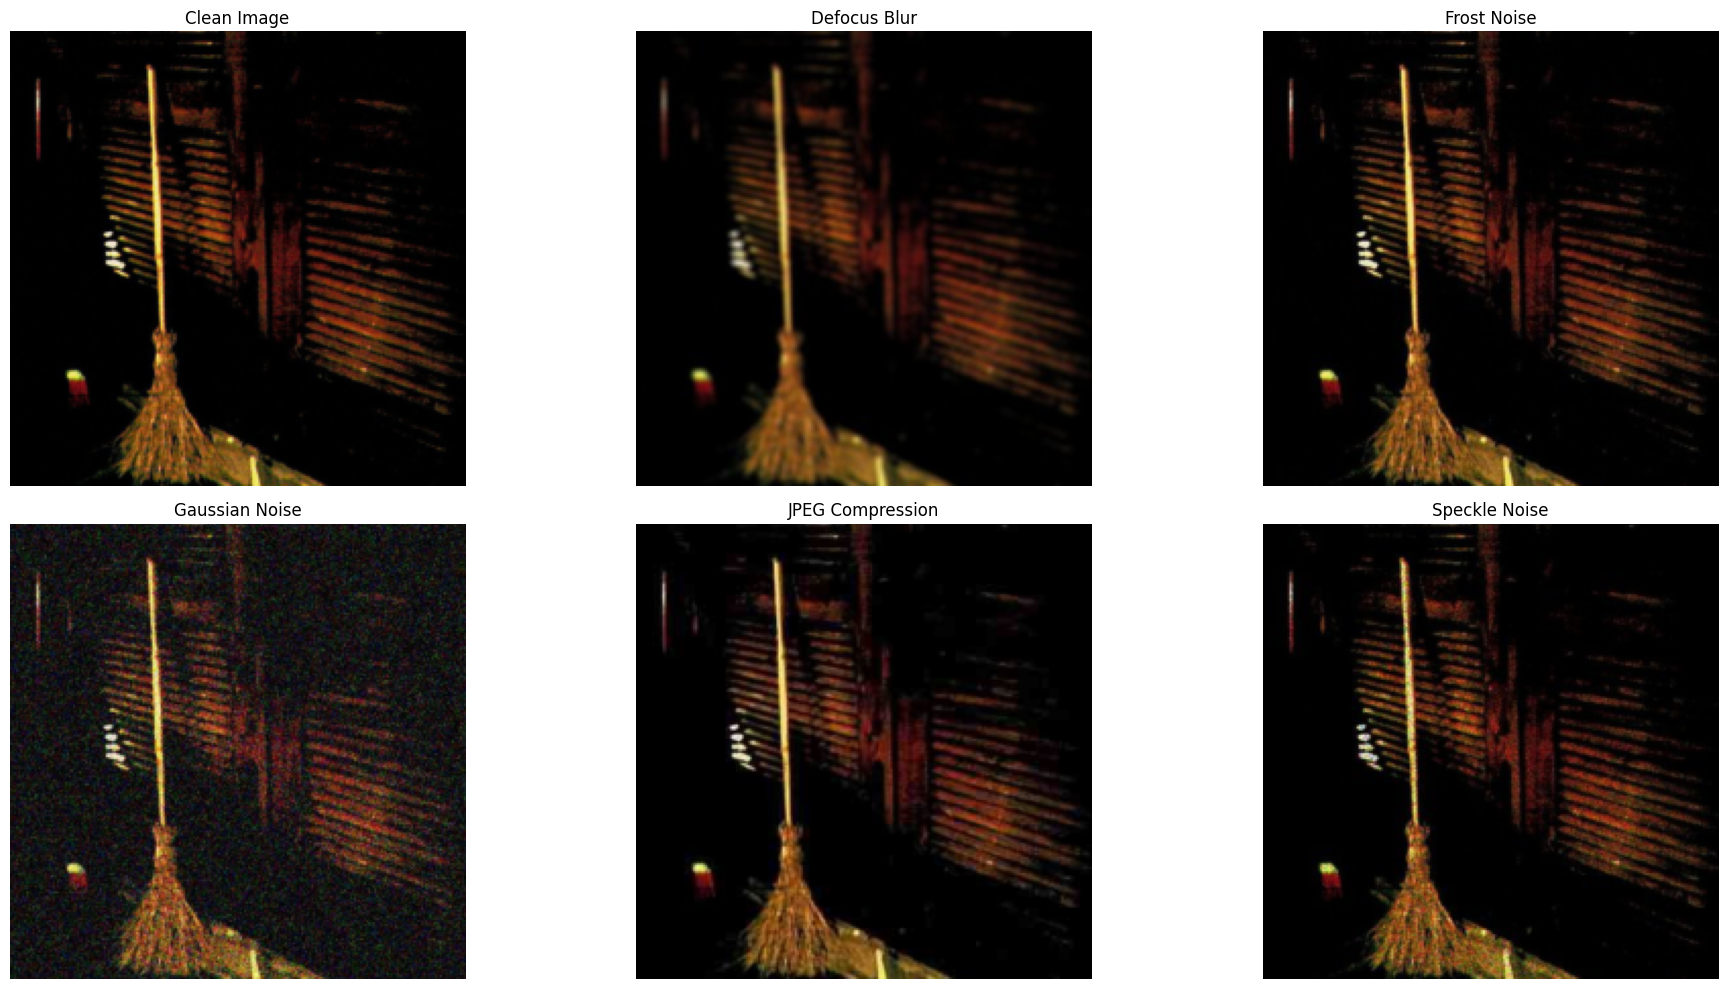

In [2]:
import matplotlib.pyplot as plt

def denormalize(tensor):
    mean = torch.tensor([0.485, 0.456, 0.406]).view(1, 1, 3)
    std = torch.tensor([0.229, 0.224, 0.225]).view(1, 1, 3)
    tensor = tensor * std + mean
    tensor = torch.clip(tensor, 0, 1)  # Ensure values are in [0, 1]
    return tensor

sample_index = 1

# Display all the 1 image for different types of noise with the same clean image
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.imshow(denormalize(clean_batch[sample_index].permute(1, 2, 0).cpu()).numpy())
plt.title("Clean Image")
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(denormalize(defocus_batch[sample_index].permute(1, 2, 0).cpu()).numpy())
plt.title("Defocus Blur")
plt.axis('off')
plt.subplot(2, 3, 3)
plt.imshow(denormalize(frost_batch[sample_index].permute(1, 2, 0).cpu()).numpy())
plt.title("Frost Noise")
plt.axis('off')
plt.subplot(2, 3, 4)
plt.imshow(denormalize(gaussian_batch[sample_index].permute(1, 2, 0).cpu()).numpy())
plt.title("Gaussian Noise")
plt.axis('off')
plt.subplot(2, 3, 5)
plt.imshow(denormalize(jpeg_batch[sample_index].permute(1, 2, 0).cpu()).numpy())
plt.title("JPEG Compression")
plt.axis('off')
plt.subplot(2, 3, 6)
plt.imshow(denormalize(speckle_batch[sample_index].permute(1, 2, 0).cpu()).numpy())
plt.title("Speckle Noise")
plt.axis('off')
plt.tight_layout()
plt.show()

## Load the Model

In [3]:
from models.vae import ViT_VAE

save_path = "checkpoints/vae.pth"

model_args = {
    "img_size": 224,
    "patch_size": 16,
    "in_channels": 3,
    "latent_dim": 512,
    "embed_dim": 512,
    "encoder_depth": 6,
    "decoder_depth": 6,
    "num_heads": 8,
    "mlp_dim": 512 * 4,
    "dropout": 0.0
}
model = ViT_VAE(**model_args)
model.load_state_dict(torch.load(save_path))
model.eval()

device = "cpu"
if torch.cuda.is_available():
    device = "cuda"
model.to(device)
print(f"Using device: {device}")

Using device: cuda


## Denoise the Image

Here taking the Gaussian noise as an example.

In [4]:
sample_batch = gaussian_batch.to(device)
print(f"Sample batch shape: {sample_batch.shape}")
recong_batch, _, _ = model(sample_batch)
print(f"Recong batch shape: {recong_batch.shape}")

Sample batch shape: torch.Size([64, 3, 224, 224])


Recong batch shape: torch.Size([64, 3, 224, 224])


## Visualize the Denoised Image

In [5]:
recong_batch = recong_batch.detach().cpu()
sample_batch = sample_batch.detach().cpu()

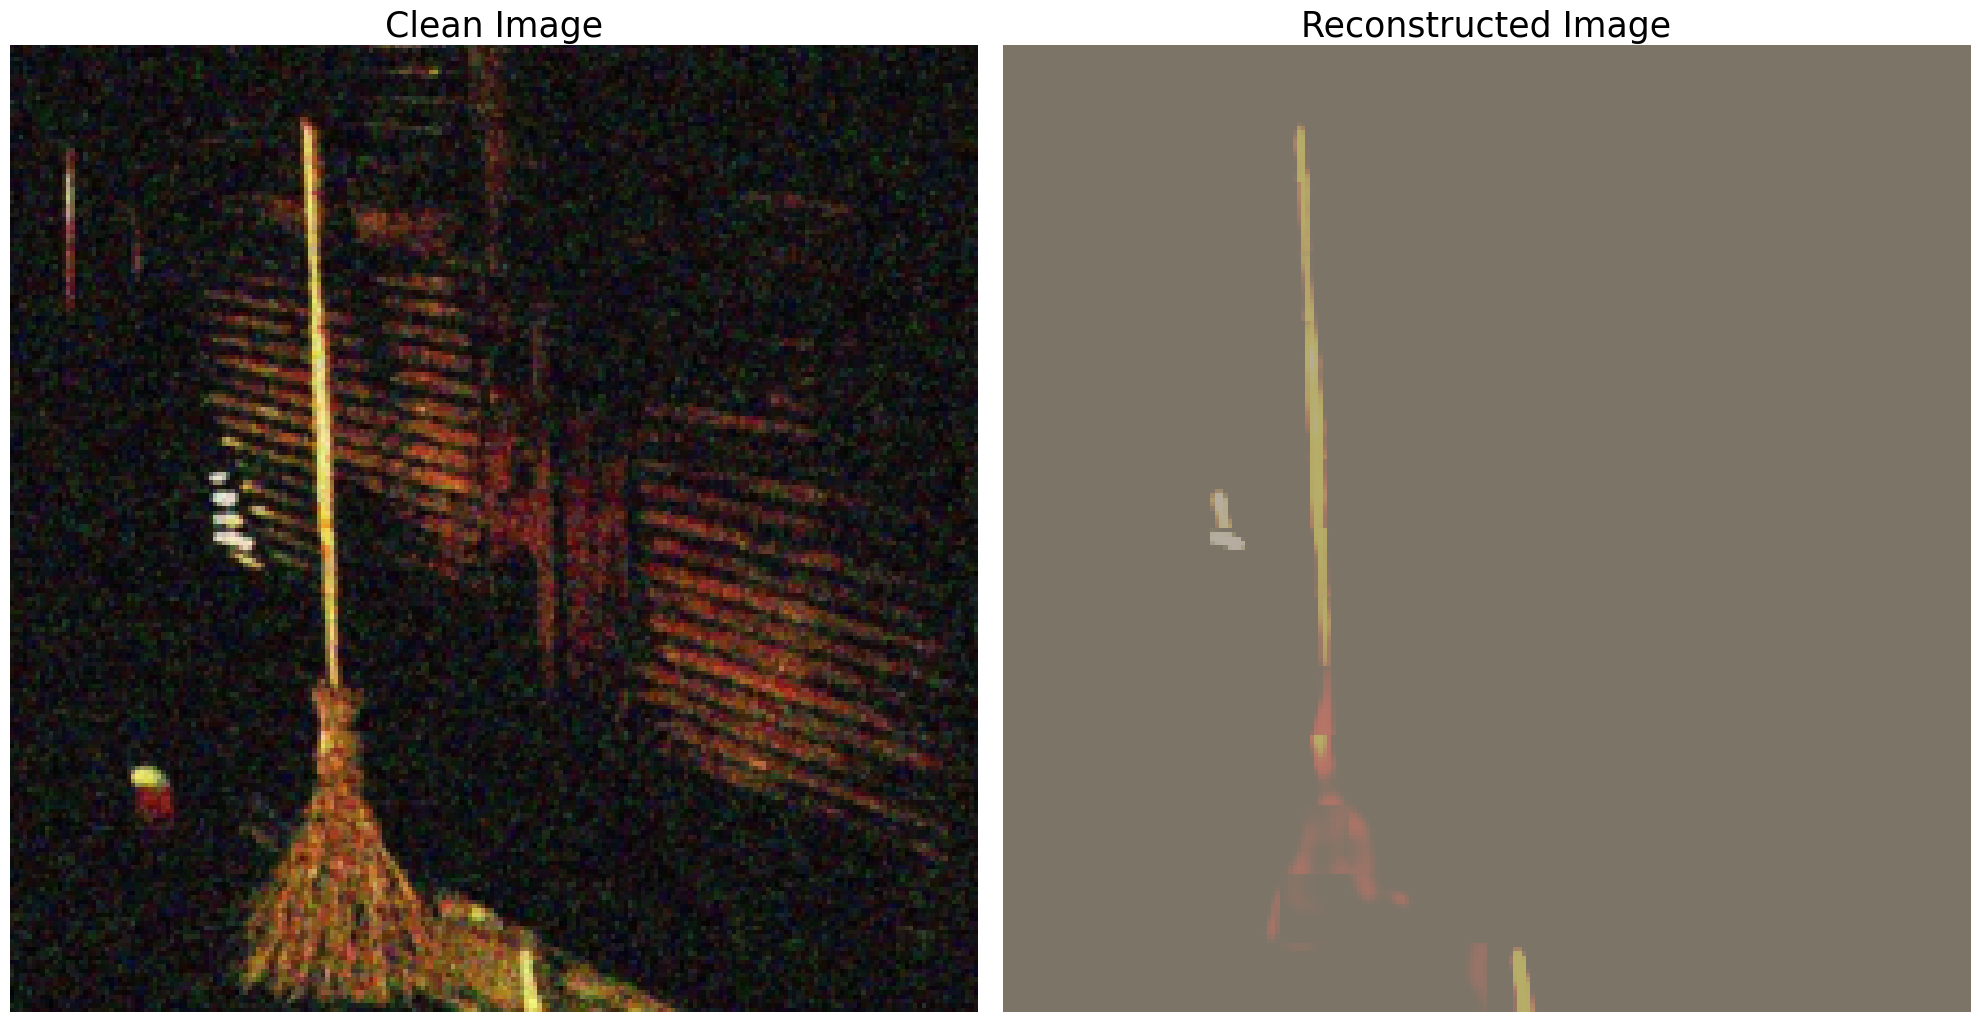

In [6]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(denormalize(sample_batch[sample_index].permute(1, 2, 0)).numpy())
plt.title("Clean Image", fontsize=25)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(denormalize(recong_batch[sample_index].permute(1, 2, 0)).numpy())
plt.title("Reconstructed Image", fontsize=25)
plt.axis('off')
plt.tight_layout()
plt.show()